Note: this example comes from http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html but it's missing some pieces of code, so it's currently incomplete.

In [1]:
include("preamble.jl")

@pyimport sklearn

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in vect at abstractarray.jl:38
 in find_in_path at /Users/cedric/.julia/v0.4/Autoreload/src/files.jl:11
 in find_file at /Users/cedric/.julia/v0.4/Autoreload/src/files.jl:40
 in arequire at /Users/cedric/.julia/v0.4/Autoreload/src/Autoreload.jl:50
 in include at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/cedric/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/cedric/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/cedric/Programa/Sklearn/notebooks/preamble.jl, in expression starting on line 4
 in depwarn at deprecated.jl:73
 [inlined code] from deprecated.jl:694
 in require at no file:0

In [8]:
@pyimport sklearn.svm as svm
@pyimport sklearn.datasets as datasets
@pyimport sklearn.feature_selection as feature_selection
@pyimport sklearn.pipeline as sk_pipeline

In [11]:
# generate some data to play with
X, y = datasets.samples_generator[:make_classification](n_informative=5, n_redundant=0, random_state=42);

In [15]:
# ANOVA SVM-C
anova_filter = feature_selection.SelectKBest(feature_selection.f_regression, k=5)
clf = svm.SVC(kernel="linear")
anova_svm = sk_pipeline.Pipeline([("anova", anova_filter), ("svc", clf)])

PyObject Pipeline(steps=[('anova', SelectKBest(k=5, score_func=<function f_regression at 0x313e57d70>)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [17]:
# You can set the parameters using the names issued
# For instance, fit using a k of 10 in the SelectKBest
# and a parameter 'C' of the svm
fit!(anova_svm[:set_params](anova__k=10, svc__C=.1), X, y)

Pipeline(steps=[...])
prediction = anova_svm.predict(X)
anova_svm.score(X, y)                        
0.77...
# getting the selected features chosen by anova_filter
anova_svm.named_steps['anova'].get_support()
... 
array([ True,  True,  True, False, False,  True, False,  True,  True, True,
       False, False,  True, False,  True, False, False, False, False,
       True], dtype=bool)

LoadError: LoadError: syntax: invalid identifier name "..."
while loading In[17], in expression starting on line 5

In [3]:
srand(33)

n_samples = 1500
noisy_circles = sk_data.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = sk_data.make_moons(n_samples=n_samples, noise=.05)
blobs = sk_data.make_blobs(n_samples=n_samples, random_state=8)
no_structure = rand(n_samples, 2), nothing

colors0 = collect("bgrcmykbgrcmykbgrcmykbgrcmyk")
colors = vcat(fill(colors, 20)...)

clustering_names = [
    "MiniBatchKMeans", "AffinityPropagation", "MeanShift",
    "SpectralClustering", "Ward", "AgglomerativeClustering",
    "DBSCAN", "Birch"];

  likely near In[4]:9
  likely near In[4]:9
//anaconda/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:215: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
//anaconda/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:205: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
//anaconda/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:440: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
//anaconda/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:205: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Comple

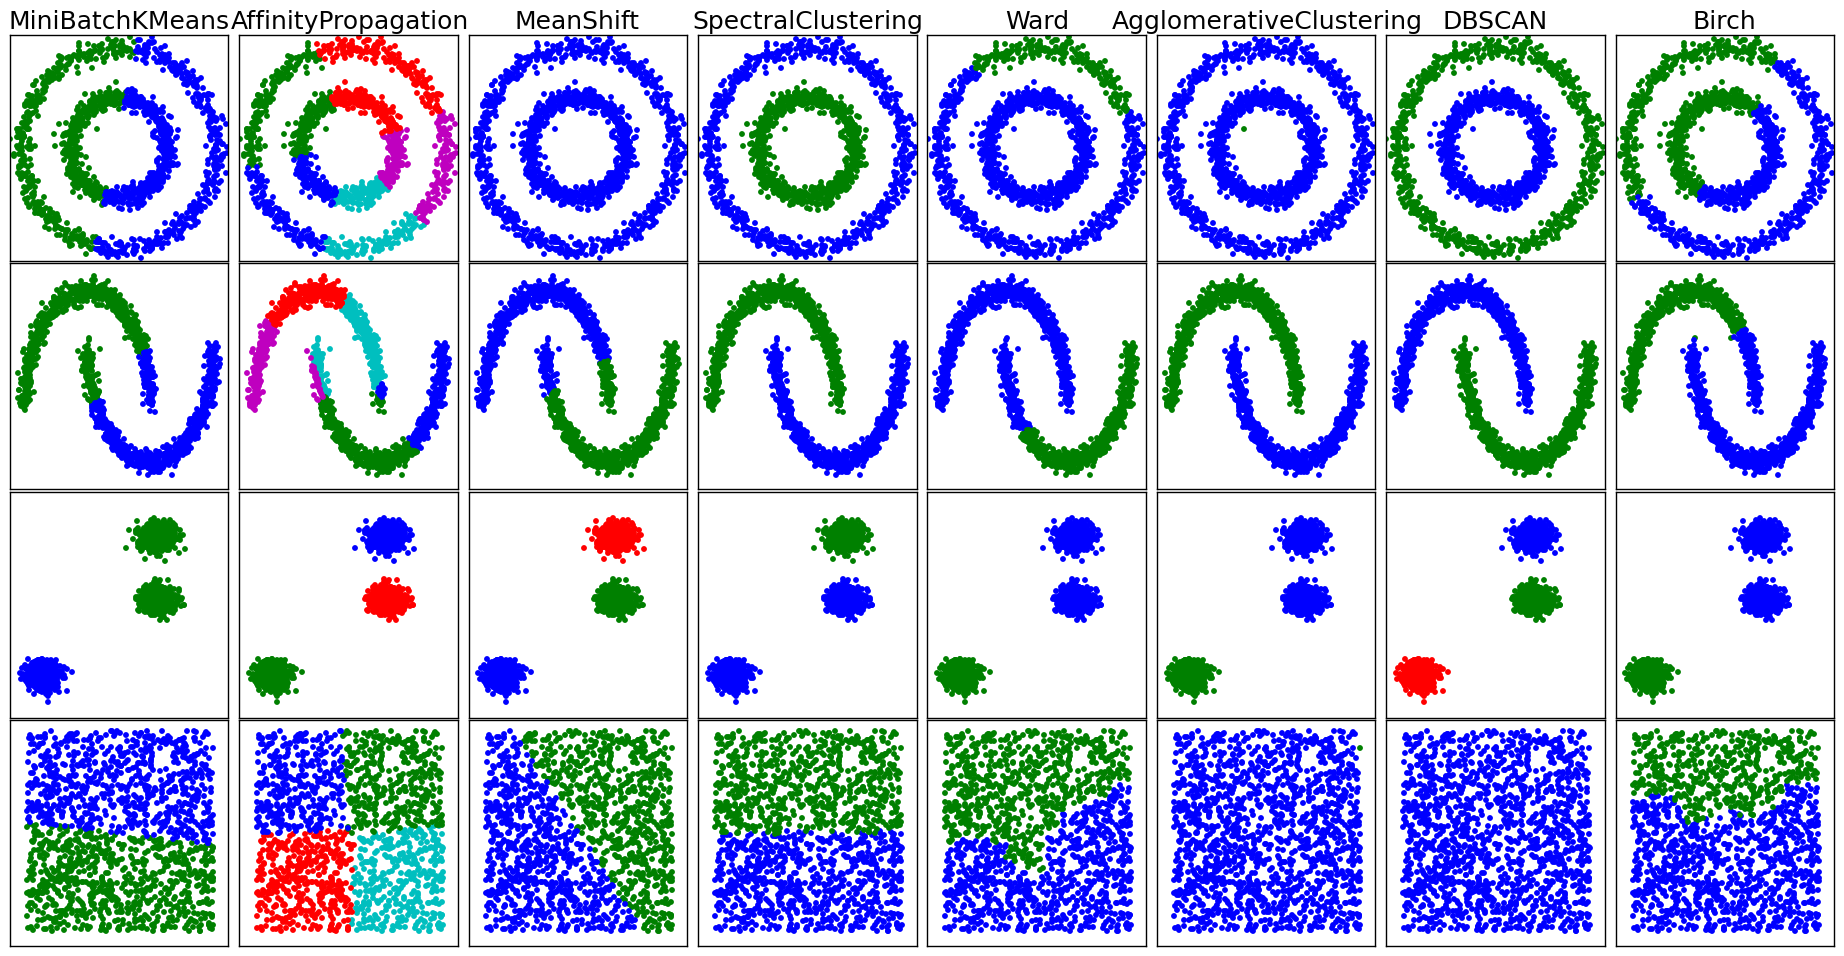

In [4]:
figure(figsize=(length(clustering_names) * 2 + 3, 9.5))
subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

datasets = [noisy_circles, noisy_moons, blobs, no_structure]

for (i_dataset, dataset) in enumerate(datasets)

    X, y = dataset
    # normalize dataset for easier parameter selection
    X = fit_transform!(sk_preproc.StandardScaler(), X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

    # connectivity matrix for structured Ward
    connectivity = neighbors.kneighbors_graph(X, n_neighbors=10, include_self=false)[:todense]() # PyCall does not support numpy sparse matrices
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity')

    # create clustering estimators
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=true)
    two_means = cluster.MiniBatchKMeans(n_clusters=2)
    ward = cluster.AgglomerativeClustering(n_clusters=2, linkage="ward",
                                           connectivity=connectivity)
    spectral = cluster.SpectralClustering(n_clusters=2,
                                          eigen_solver="arpack",
                                          affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=.2)
    affinity_propagation = cluster.AffinityPropagation(damping=.9,
                                                       preference=-200)

    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock", n_clusters=2,
        connectivity=connectivity)

    birch = cluster.Birch(n_clusters=2)
    clustering_algorithms = [
        two_means, affinity_propagation, ms, spectral, ward, average_linkage,
        dbscan, birch]

    for (name, algorithm) in zip(clustering_names, clustering_algorithms)
        fit!(algorithm, X)
        y_pred = nothing
        try
            y_pred = predict(algorithm, X)
        catch e
            if isa(e, KeyError)
                y_pred = map(Int, algorithm[:labels_])
                clamp!(y_pred, 0, 27) # not sure why some algorithms return -1
            else rethrow() end
        end
        subplot(4, length(clustering_algorithms), plot_num)
        if i_dataset == 1
            title(name, size=18)
        end

        for y_val in unique(y_pred)
            selected = y_pred.==y_val
            scatter(X[selected, 1], X[selected, 2], color=string(colors0[y_val+1]), s=10)
        end

        xlim(-2, 2)
        ylim(-2, 2)
        xticks(())
        yticks(())
        plot_num += 1
    end
end